In [1]:
from IPython.display import display
from data.datafinder import DataFinder

df = DataFinder()
data = df.get() # clean data

print("\n--- TRAIN ---")
display(data["train"].sample(5))

print("\n--- TEST ---")
display(data["test"].sample(5))

print("\n--- CORPUS ---")
display(data["corpus"].sample(5))


--- TRAIN ---


,title,authors,abstract,year,query,keyphrase_query,positives,negatives
5023,Universal Adversarial Perturbations Against Pe...,"[{'first': 'Wenjie', 'middle': [], 'last': 'Di...",Person re-identification (re-ID) has made grea...,2019,A framework for attacking person re-identifica...,person re-identification images,[Market-1501],"[SYSU-MM01, Airport, Partial-REID, Partial-iLIDS]"
14097,An Experiment on the Use of Genetic Algorithms...,"[{'first': 'Fernando', 'middle': [], 'last': '...",The choice of a good topology for a deep neura...,2019,A system to evolve topologies for deep neural ...,topology selection deep neural networks images,[CIFAR-10],"[BotNet, UNSW-NB15, NATS-Bench, UNITOPATHO, Go..."
9142,CLEF 2017 NewsREEL Overview: A Stream-Based Re...,"[{'first': 'Andreas', 'middle': [], 'last': 'L...",News recommender systems provide users with ac...,2017,I want to learn to recommend news articles to ...,news recommendation articles,[MovieLens],"[MIND, SNIPS, ReDial, DuRecDial]"
8023,Learning Temporal Embeddings for Complex Video...,"[{'first': 'Vignesh', 'middle': [], 'last': 'R...","In this paper, we propose to learn temporal em...",2015,Temporal embedding learning for video frames.,temporal embedding learning video,"[ImageNet, UCF101]","[SYNTHIA-AL, PoseTrack, THUMOS14, TUM Kitchen,..."
1031,Saliency Preservation in Low-Resolution Graysc...,"[{'first': 'Shivanthan', 'middle': ['A.C.'], '...",Visual saliency detection originated over 500 ...,2017,Saliency information is preserved in low-resol...,visual saliency detection images,[CAT2000],"[SALICON, BraTS 2013, LFSD, DIV2K, HKU-IS, UAV..."



--- TEST ---


,query,keyphrase_query,positives
283,We propose a system for multilingual speech re...,speech recognition low-resource,[Switchboard-1 Corpus]
163,I propose a novel scheme for image restoration...,image restoration,"[BSD, LIVE1, Set14, Set5]"
129,We propose a method for adding global context ...,semantic segmentation image,"[PASCAL Context, PASCAL VOC]"
114,I explore methods to improve semantic image se...,semantic image segmentation,"[Amazon Review, NYUv2, PASCAL Context, PASCAL ..."
204,I present an end-to-end integrated approach fo...,3d human pose estimation image,"[Human3.6M, LSP, MPII Human Pose]"



--- CORPUS ---


,id,title,description,year,tasks,modalities,popularity
4520,"1,507 People 102,476 Images Multi-pose and Mul...",<NA>,"Description:\r\n1,507 People 102,476 Images Mu...",2022.0,"[Pose Estimation, Facial Expression Recognitio...",The modality of data contained are images,0
4765,ASSIN,<NA>,ASSIN (Avaliação de Similaridade Semântica e I...,NaN,[STS],The modality of data contained are texts,0
4267,WITS,"When did you become so smart, oh wise one?! Sa...","This dataset is an extension of MASAC, a multi...",2022.0,"[Sarcasm Detection, Wikipedia Summarization]","The modality of data contained are videos, tex...",2
723,DAVIS 2017,The 2017 DAVIS Challenge on Video Object Segme...,DAVIS17 is a dataset for video object segmenta...,2017.0,"[Semantic Segmentation, Video Object Segmentat...",The modality of data contained are images and ...,183
3755,DigiFace-1M,DigiFace-1M: 1 Million Digital Face Images for...,**DigiFace-1M** is a **synthetic dataset** for...,2022.0,[Face Recognition],The modality of data contained are images,1


In [2]:
print(f"\nTotal training examples: {len(data['train'])}")
print(f"Total test examples: {len(data['test'])}")
print(f"Total datasets in corpus: {len(data['corpus'])}")


Total training examples: 17396
Total test examples: 387
Total datasets in corpus: 5548


In [3]:
train_ids = set(d for lst in data["train"]["positives"] for d in lst)
test_ids = set(d for lst in data["test"]["positives"] for d in lst)

# Report distinct ID counts
print(f"\nUnique dataset IDs in training set: {len(train_ids)}")
print(f"Unique dataset IDs in test set: {len(test_ids)}")

# Compare overlap and exclusive dataset IDs between splits
print(f"Dataset IDs common to both: {len(train_ids & test_ids)}")
print(f"Dataset IDs appearing only in train: {len(train_ids - test_ids)}")
print(f"Dataset IDs appearing only in test: {len(test_ids - train_ids)}")


Unique dataset IDs in training set: 459
Unique dataset IDs in test set: 294
Dataset IDs common to both: 126
Dataset IDs appearing only in train: 333
Dataset IDs appearing only in test: 168


In [4]:
all_query_ids = train_ids | test_ids
corpus_ids = set(data["corpus"]["id"])

used_in_queries = all_query_ids & corpus_ids
unused_in_queries = corpus_ids - all_query_ids

print(f"Datasets used in any query: {len(used_in_queries)}")
print(f"Datasets never used in any query: {len(unused_in_queries)}")

Datasets used in any query: 627
Datasets never used in any query: 4921


In [5]:
# Get dataset-to-dataset links
query_links = df.get_links_from_queries()
task_links = df.get_links_from_tasks()

print("\n🔗 Links from queries (co-occurrence in positives):")
print(f"Number of datasets with links: {len(query_links)}")

print("\n🔗 Links from tasks (shared task annotations):")
print(f"Number of datasets with links: {len(task_links)}")

# Identify shared dataset IDs (those present in both link dictionaries)
common_datasets = sorted(set(query_links.keys()) & set(task_links.keys()))

print(f"\nDatasets present in both link types: {len(common_datasets)}")

# Sample first 5 for comparison
print("\nSample comparison (first 5 common IDs):")
for dataset in common_datasets[:5]:
    q_related = sorted(query_links.get(dataset, []))
    t_related = sorted(task_links.get(dataset, []))
    print(f"\nDataset: {dataset}")
    print(f"  From queries: {q_related}")
    print(f"  From tasks:   {t_related}")


🔗 Links from queries (co-occurrence in positives):
Number of datasets with links: 486

🔗 Links from tasks (shared task annotations):
Number of datasets with links: 5367

Datasets present in both link types: 480

Sample comparison (first 5 common IDs):

Dataset: 2000 HUB5 English
  From queries: ['Switchboard-1 Corpus']
  From tasks:   ['1,000 Hours - American English Colloquial Video Speech Data', '1,002 Hours - Kunming Dialect Speech Data by Mobile Phone', '1,012 Hours - Indian English Speech Data by Mobile Phone', '1,025 Hours - Mandarin Strong Accent Speech Data by Mobile Phone', '1,027 People - Wake-up Words Speech Data by Microphone', '1,420 Hours- Mandarin Spontaneous Speech Data by Mobile Phone', '1,796 Hours - German Speech Data by Mobile Phone', '11,010 People - Chines Digital Speech Data by Mobile Phone', '176 Hours - Suzhou Dialect Speech Data by Mobile Phone', '199 Hours - Australian English Speech Data by Mobile Phone', '2,028 Hours - Mandarin Speech Data by Mobile Phone'

#### Task Distribution (Corpus)
##### How many datasets are associated with each task?

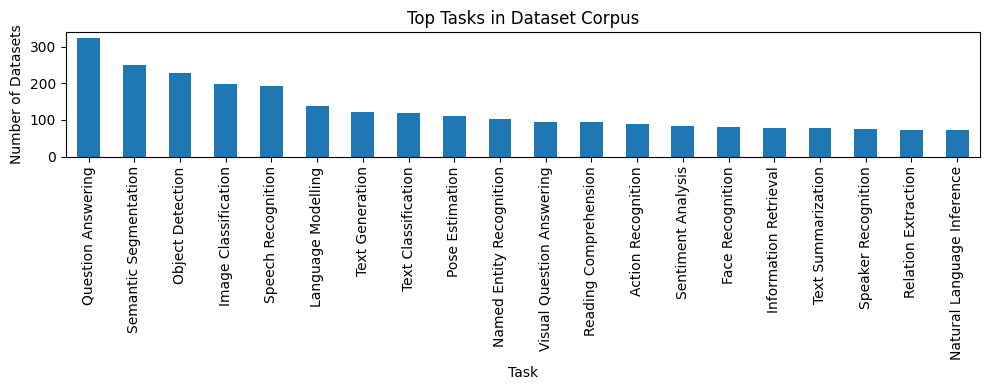

In [6]:
import matplotlib.pyplot as plt

task_counts = data["corpus"]["tasks"].explode().value_counts()

task_counts.head(20).plot(kind="bar", title="Top Tasks in Dataset Corpus", figsize=(10, 4))
plt.ylabel("Number of Datasets")
plt.xlabel("Task")
plt.tight_layout()
plt.show()

#### Age Distribution (Corpus)

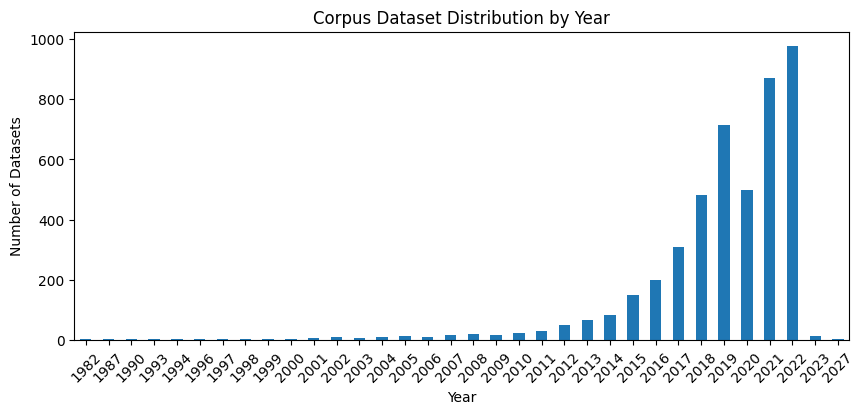

In [7]:
# Keep the most recent year per dataset ID 
# (Each ID in the corpus may be associated with multiple years due to different dataset variants or updates)
latest_years = (
    data["corpus"]
    .dropna(subset=["year"])  # remove rows with missing year
    .groupby("id")["year"]
    .max()
    .astype(int)
)

latest_years.value_counts().sort_index().plot(
    kind="bar", figsize=(10, 4), title="Corpus Dataset Distribution by Year"
)
plt.xlabel("Year")
plt.ylabel("Number of Datasets")
plt.xticks(rotation=45)
plt.show()

In [8]:
df = DataFinder()
corpus = df.get_raw()["corpus"]
print(corpus.sample(1).T)

                                                              7484
id                                                         Perseus
contents         **Perseus** is a dataset for Cross-Lingual Sum...
variants                                                 [Perseus]
title                    Long-Document Cross-Lingual Summarization
year                                                        2022.0
date                                                    2022-12-01
structured_info  This dataset can be used to study the task of ...


In [9]:
test = df.get_raw()["train"]
print(test.sample(1).T)

                                                                         1777
paper_id                                                            198953220
title                                            Cooperative image captioning
authors                     [{'first': 'Gilad', 'middle': [], 'last': 'Ver...
abstract                    When describing images with natural language, ...
year                                                                     2019
arxiv_id                                                           1907.11565
acl_id                                                                   None
pmc_id                                                                   None
pubmed_id                                                                None
doi                                                                      None
venue                                                                   ArXiv
journal                                                         

In [10]:
test = df.get_raw()["test"]
print(test.sample(1).T)

                                                                92
documents                      [ImageNet, Omniglot, Penn Treebank]
year                                                          2016
keyphrase_query  image classification, part speech tagging, dep...
abstract         Learning from a few examples remains a key cha...
task             image classification, part of speech tagging, ...
domain                                                        <NA>
modality                                                      <NA>
language                                                      <NA>
training_style                                            Few-shot
text_length                                                   <NA>
query            We propose a framework for few-shot learning o...
